*  https://colab.research.google.com/drive/1lK1fzLU6Yq8iZELZnUgmkSFCa-VEsHIk?usp=sharing

1. Pasar el formato de imagen .png al formato de Pandas o Numpy en colab, donde quede como matriz numérica.

In [ ]:
import os
import sklearn
import numpy as np
from PIL import Image
from numpy import asarray
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd

images = []
lables = []
clases = []
directory = "/content/drive/MyDrive/Datasets"
f = ""
for filename in os.listdir(directory):
  if filename != ".ipynb_checkpoints":
    clases.append(filename)
    for img in os.listdir(os.path.join(directory, filename)):
      images.append(np.asarray(sklearn.preprocessing.minmax_scale(asarray(Image.open(os.path.join(directory, filename, img)).convert('L')), feature_range=(0,1))))
      lables.append(clases.index(filename))

print(len(images), len(lables))
print(clases)


6000 6000
['AbdomenCT', 'BreastMRI', 'CXR', 'ChestCT', 'Hand', 'HeadCT']


In [ ]:
print(len(images))
print(images[0])
print(len(images[0]))

6000
[[0.53846154 0.52941176 0.35714286 ... 0.47368421 0.63636364 0.54545455]
 [0.53846154 0.52941176 0.35714286 ... 0.47368421 0.63636364 0.54545455]
 [0.53846154 0.52941176 0.35714286 ... 0.47368421 0.63636364 0.54545455]
 ...
 [0.53846154 0.52941176 0.35714286 ... 0.47368421 0.63636364 0.54545455]
 [0.53846154 0.52941176 0.35714286 ... 0.47368421 0.63636364 0.54545455]
 [0.53846154 0.52941176 0.35714286 ... 0.47368421 0.63636364 0.54545455]]
64


Text(0.5, 1.0, 'Hand (4)')

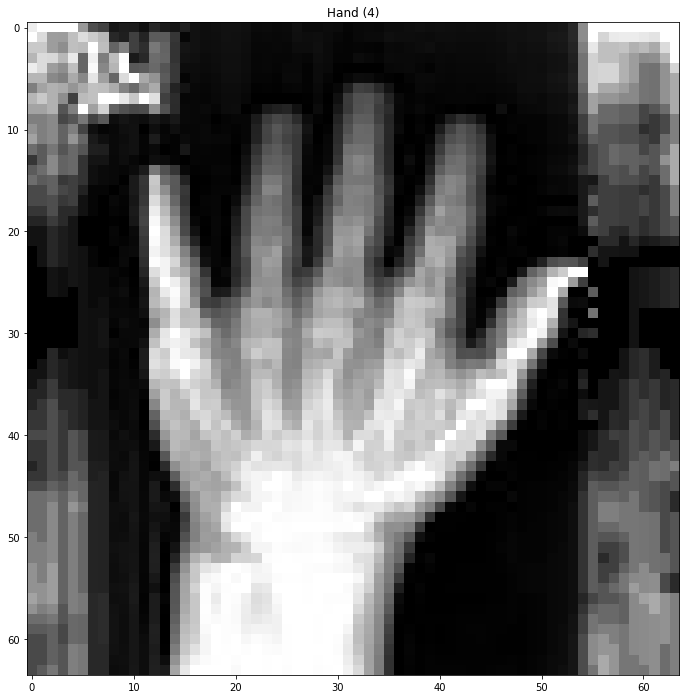

In [ ]:
image, clase = images[4000], lables[4000]
img = np.squeeze(image)
fig = plt.figure(figsize = (12,12))
ax = fig.add_subplot(111)
ax.imshow(img, cmap='gray')
width, height = img.shape
thresh = img.max()/2.5

for x in range(width):
    for y in range(height):
        val = round(img[x][y],2) if img[x][y] !=0 else 0
ax.set_title(str(clases[clase]) + " (" + str(clase) + ")")

2. Hacer el preprocesamiento debido (si se requiere) de lo aprendido en clase para ingresar a un algoritmo de clasificación.

3.	Seleccionar un modelo de Machine Learning de clasificación para determinar el tipo de examen al cual pertenece una imagen (recuerde dividir la base de datos en training y testing).

In [ ]:
from sklearn.model_selection import train_test_split

training_img, testing_img, train_lab, test_lab = train_test_split(images, lables, test_size=0.2, random_state=42)

t = []
for i in training_img:#4800
  im = []
  for r in i:#64
    for c in r:#64
      im.append(c)
  t.append(im)
train_img = t[:]

t = []
for i in testing_img:#4800
  im = []
  for r in i:#64
    for c in r:#64
      im.append(c)
  t.append(im)
test_img = t[:]

print(len(training_img), "+", len(testing_img), "=", len(training_img) + len(testing_img))
print(len(train_lab), "+", len(test_lab), "=", len(train_lab) + len(test_lab))

4800 + 1200 = 6000
4800 + 1200 = 6000


In [ ]:
a = np.array(training_img)
model = SVC(kernel='linear', C=1, decision_function_shape='ovo')
print(training_img[1])
model.fit(train_img, train_lab)

[[0.6        0.47826087 0.54545455 ... 0.55555556 0.375      0.4       ]
 [0.6        0.47826087 0.54545455 ... 0.55555556 0.375      0.4       ]
 [0.6        0.47826087 0.54545455 ... 0.55555556 0.375      0.4       ]
 ...
 [1.         0.17391304 0.63636364 ... 0.88888889 0.16666667 0.73333333]
 [0.9        0.2173913  0.95454545 ... 0.66666667 0.625      0.4       ]
 [0.2        0.91304348 0.         ... 0.         0.25       0.6       ]]


SVC(C=1, decision_function_shape='ovo', kernel='linear')

Prediccion: Hand


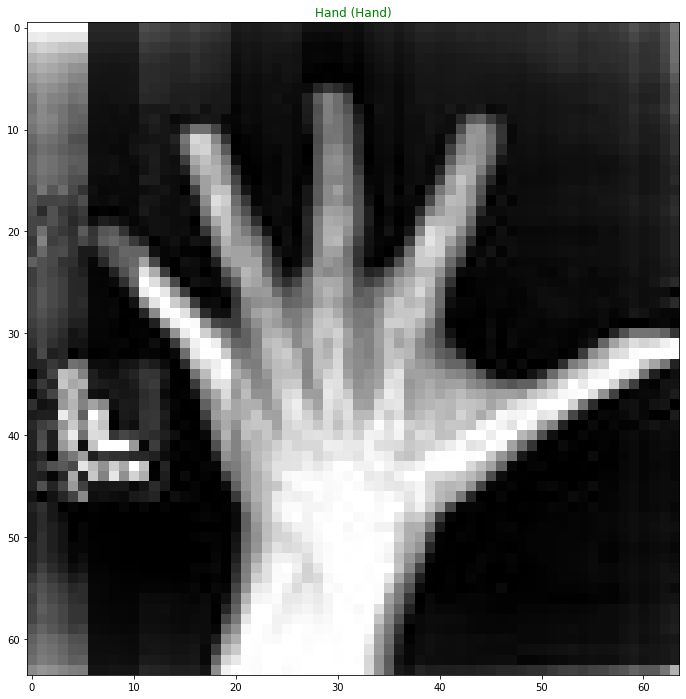

In [ ]:
n = 3001
image = training_img[n]
clase = train_lab[n]

imagen = train_img[n]
imagen = np.array([imagen])
prediccion = model.predict(imagen)

print("Prediccion: " + clases[prediccion[0]])

img = np.squeeze(image)
fig = plt.figure(figsize = (12,12))
ax = fig.add_subplot(111)
ax.imshow(img, cmap='gray')
width, height = img.shape
thresh = img.max()/2.5

color = ""
if str(clases[clase]) == str(clases[prediccion[0]]):
  color = "green"
else:
  color = "red"

for x in range(width):
    for y in range(height):
        val = round(img[x][y],2) if img[x][y] !=0 else 0
        ax.set_title(f"{str(clases[clase])} ({clases[prediccion[0]]})", color = color)

4.	Utilizar el método Gridsearch para determinar el método óptimo.

In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

GBC = GradientBoostingClassifier()

parameters = {'learning_rate': [0.01,0.02,0.03], 'subsample'    : [0.9, 0.5, 0.2], 'n_estimators' : [100,500,1000], 'max_depth'    : [4,6,8]}

grid_GBC = GridSearchCV(estimator=GBC, param_grid = parameters, cv = 2, n_jobs=-1)
grid_GBC.fit(train_img, train_lab)

print(" Results from Grid Search ")
print("\n The best estimator across ALL searched params:\n",grid_GBC.best_estimator_)
print("\n The best score across ALL searched params:\n",grid_GBC.best_score_)
print("\n The best parameters across ALL searched params:\n",grid_GBC.best_params_)

5.	Utilizar un algoritmo de scoring y mostrar la matriz de confusión.

In [ ]:
print('Precision: ', model.score(test_img, test_lab))

Precision:  0.9958333333333333


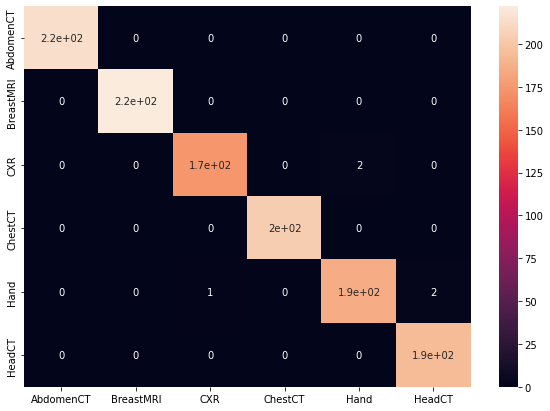

In [ ]:
model_pred = model.predict(test_img)
model_confusion_matrix = confusion_matrix(test_lab, model_pred)

df_cm = pd.DataFrame(model_confusion_matrix, index = [i for i in clases],
                  columns = [i for i in clases])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)